**with KNN**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
df=pd.read_csv('knapsack_5_items.csv')

In [ ]:
df.head()

,Weights,Prices,Capacity,Best picks,Best price
0,[46 40 42 38 10],[12 19 19 15 8],40,[0. 1. 0. 0. 0.],19.0
1,[11 31 4 6 7],[ 2 8 18 16 3],64,[1. 1. 1. 1. 1.],47.0
2,[32 49 27 37 24],[19 16 16 4 1],87,[1. 0. 1. 0. 1.],36.0
3,[20 35 22 23 16],[19 17 19 9 1],21,[1. 0. 0. 0. 0.],19.0
4,[ 7 12 19 13 20],[10 11 18 15 5],50,[0. 1. 1. 1. 0.],44.0


In [ ]:

df.shape

(10000, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Weights     10000 non-null  object 
 1   Prices      10000 non-null  object 
 2   Capacity    10000 non-null  int64  
 3   Best picks  9879 non-null   object 
 4   Best price  10000 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 390.8+ KB


In [ ]:
df.isnull().sum()

Weights         0
Prices          0
Capacity        0
Best picks    121
Best price      0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.describe()

,Capacity,Best price
count,9879.000000,9879.000000
mean,57.659682,31.309647
std,24.367130,13.282681
min,15.000000,1.000000
25%,36.000000,21.000000
50%,58.000000,31.000000
75%,79.000000,40.000000
max,99.000000,82.000000


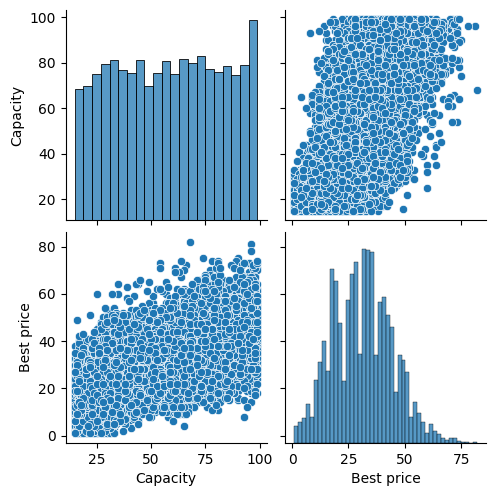

In [ ]:
sns.pairplot(df)

In [ ]:
#trasformer les colonne en ndarray
weights = np.array([np.fromstring(obj.strip('[]'), sep=' ') for obj in df['Weights']])


In [ ]:
weights

array([[46., 40., 42., 38., 10.],
       [11., 31.,  4.,  6.,  7.],
       [32., 49., 27., 37., 24.],
       ...,
       [43., 43.,  5., 15., 23.],
       [49.,  9., 15., 21., 39.],
       [25., 36., 42., 19., 39.]])

In [ ]:
Prices=np.array([np.fromstring(obj.strip('[]'), sep=' ') for obj in df['Prices']])
Prices

array([[12., 19., 19., 15.,  8.],
       [ 2.,  8., 18., 16.,  3.],
       [19., 16., 16.,  4.,  1.],
       ...,
       [15.,  5.,  7.,  2.,  7.],
       [11., 15.,  3., 12., 19.],
       [15., 12.,  7., 18., 12.]])

In [ ]:
Best_picks=np.array([np.fromstring(obj.strip('[]'), sep=' ') for obj in df['Best picks']])

In [ ]:
Best_picks

array([[0., 1., 0., 0., 0.],
       [1., 1., 1., 1., 1.],
       [1., 0., 1., 0., 1.],
       ...,
       [1., 0., 1., 0., 0.],
       [0., 1., 1., 0., 1.],
       [1., 0., 0., 1., 0.]])

In [ ]:
capacity=df['Capacity'].values

In [ ]:
capacity


array([40, 64, 87, ..., 62, 65, 79], dtype=int64)

In [ ]:
# Combiner les poids et les prix dans une seule matrice de caractéristiques 
features = np.hstack((weights, Prices))


In [ ]:
features

array([[46., 40., 42., ..., 19., 15.,  8.],
       [11., 31.,  4., ..., 18., 16.,  3.],
       [32., 49., 27., ..., 16.,  4.,  1.],
       ...,
       [43., 43.,  5., ...,  7.,  2.,  7.],
       [49.,  9., 15., ...,  3., 12., 19.],
       [25., 36., 42., ...,  7., 18., 12.]])

In [ ]:
# Normaliser les données
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
features_normalized = scaler.fit_transform(features)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)


In [ ]:
from sklearn.metrics import accuracy_score
# Calculer l'exactitude
accuracy = accuracy_score(Best_picks, knn.predict(features_normalized))
print(f'Exactitude du modèle KNN : {accuracy * 100:.2f}%')


Exactitude du modèle KNN : 47.23%


In [ ]:
import os
import time
import csv
import random
# Classe Objet
class Objet:
    def __init__(self, profit, volume):
        self.profit = profit
        self.volume = volume
# Recherche locale avec tabou
def recherche_locale_avec_tabou(solution_initiale, objets, capacite, tabou_size=10):
    solution = solution_initiale[:]
    tabou_list = []
    meilleur_profit = calculer_profit(solution)

    for _ in range(100):  # Nombre max d'itérations
        amelioration = False
        for objet in objets:
            if objet not in solution and objet not in tabou_list:
                voisin = solution + [objet]
                if calculer_volume(voisin) <= capacite:  # Respecter la contrainte de capacité
                    profit_voisin = calculer_profit(voisin)
                    if profit_voisin > meilleur_profit:
                        solution = voisin
                        meilleur_profit = profit_voisin
                        tabou_list.append(objet)
                        if len(tabou_list) > tabou_size:
                            tabou_list.pop(0)
                        amelioration = True
        if not amelioration:
            break
    return solution
# Calculer le profit total d'une solution
def calculer_profit(solution):
    return sum(objet.profit for objet in solution)

# Calculer le volume total d'une solution
def calculer_volume(solution):
    return sum(objet.volume for objet in solution)
# Lire les données d'une instance
def lire_fichier(filepath):
    objets = []
    try:
        with open(filepath, 'r') as file:
            N = int(file.readline().strip())  # Nombre d'objets
            capacite = int(file.readline().strip())  # Capacité du sac
            for _ in range(N):
                profit, volume = map(int, file.readline().strip().split())
                objets.append(Objet(profit, volume))
    except Exception as e:
        raise ValueError(f"Erreur dans le fichier {filepath}: {e}")
    return objets, capacite

In [ ]:

# Fonction pour prédire sur de nouvelles instances avec KNN
def knn_prediction(objets, model, scaler, subset_size=5):
    aggregated_predictions = np.zeros(len(objets))
    for start in range(0, len(objets), subset_size):
        end = min(start + subset_size, len(objets))
        subset = objets[start:end]
        features = np.array([[obj.volume, obj.profit] for obj in subset]).flatten().reshape(1, -1)
        features_normalized = scaler.transform(features)
        if features_normalized.shape[1] == subset_size * 2:  # Assurez-vous que les dimensions correspondent
            subset_predictions = model.predict(features_normalized)
            for i, pred in enumerate(subset_predictions[0]):
                if pred == 1:
                    aggregated_predictions[start + i] = 1
    return aggregated_predictions

# Méthode GRASP avec KNN
def grasp_avec_knn(objets, capacite, model, scaler, subset_size=5):
    meilleure_solution = []
    meilleur_profit = 0
    max_iterations = 100

    for _ in range(max_iterations):
        predictions = knn_prediction(objets, model, scaler, subset_size)
        solution_knn = [objets[i] for i, pred in enumerate(predictions) if pred == 1]
        capacite_actuelle = sum(obj.volume for obj in solution_knn)
        # Ajuster la solution si elle dépasse la capacité
        while capacite_actuelle > capacite:
            objet = random.choice(solution_knn)
            solution_knn.remove(objet)
            capacite_actuelle -= objet.volume
        S = recherche_locale_avec_tabou(solution_knn, objets, capacite, tabou_size=5)
        profit_S = calculer_profit(S)
        if profit_S > meilleur_profit:
            meilleure_solution = S
            meilleur_profit = profit_S
    return meilleure_solution

# Résolution des instances et écriture des résultats
with open("Resultat_knn.csv", "w", newline='') as f_write:
    writer = csv.writer(f_write, delimiter=";")
    writer.writerow(["Instance", "Profit", "Capacité utilisée", "Capacité maximale", "Temps écoulé (s)"])

    with open("all.txt", "r") as liste:
        nb_inst = int(liste.readline().strip())
        print(f"Nombre d'instances à résoudre : {nb_inst}")
        for j in range(nb_inst):
            inst = liste.readline().strip()
            print(f"Traitement de l'instance : {inst}")
            try:
                # Lecture des données
                objets, capacite = lire_fichier(inst)
            except Exception as e:
                print(f"Erreur lors de la lecture de l'instance {inst}: {e}")
                continue

            # Résolution de l'instance
            start_time = time.time()
            solution = grasp_avec_knn(objets, capacite, knn, scaler, subset_size=5)
            elapsed_time = time.time() - start_time

            # Calcul des résultats
            profit_solution = calculer_profit(solution)
            volume_solution = calculer_volume(solution)

            # Enregistrement dans le fichier CSV
            writer.writerow([inst, profit_solution, volume_solution, capacite, round(elapsed_time, 3)])
            print(f"Instance : {inst}, Profit : {profit_solution}, Capacité utilisée : {volume_solution}, "
                  f"Capacité maximale : {capacite}, Temps : {elapsed_time:.3f}s")
        print("=========================================================")


Nombre d'instances à résoudre : 25
Traitement de l'instance : test100-SC(1).txt
Instance : test100-SC(1).txt, Profit : 179, Capacité utilisée : 99, Capacité maximale : 101, Temps : 5.731s
Traitement de l'instance : test100-SC(2).txt
Instance : test100-SC(2).txt, Profit : 211, Capacité utilisée : 101, Capacité maximale : 101, Temps : 5.832s
Traitement de l'instance : test100-SC(3).txt
Instance : test100-SC(3).txt, Profit : 181, Capacité utilisée : 101, Capacité maximale : 101, Temps : 5.698s
Traitement de l'instance : test100-SC(4).txt
Instance : test100-SC(4).txt, Profit : 211, Capacité utilisée : 101, Capacité maximale : 101, Temps : 5.707s
Traitement de l'instance : test100-SC(5).txt
Instance : test100-SC(5).txt, Profit : 181, Capacité utilisée : 101, Capacité maximale : 101, Temps : 6.179s
Traitement de l'instance : test250-SC(1).txt
Instance : test250-SC(1).txt, Profit : 201, Capacité utilisée : 101, Capacité maximale : 101, Temps : 14.145s
Traitement de l'instance : test250-SC(2).